<a href="https://colab.research.google.com/github/SXV357/Inspirit-AI-ML-Basics-Notebooks/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os
import sys
pd.options.mode.chained_assignment = None #suppress warnings

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
!python -m spacy download en_core_web_md
import en_core_web_md
text_to_nlp = en_core_web_md.load()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 1.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
# import gdown
#gdown.download('https://drive.google.com/uc?id=1u0tnEF2Q1a7H_gUEH-ZB3ATx02w8dF4p', 'yelp_final.csv', True)
data_file  = 'yelp_final.csv'

!wget https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/yelp_final.csv

--2022-06-18 02:42:54--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/yelp_final.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 142.250.65.80, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760976 (743K) [text/csv]
Saving to: ‘yelp_final.csv’

yelp_final.csv      100%[===================>] 743.14K  --.-KB/s    in 0.007s  

2022-06-18 02:42:54 (98.3 MB/s) - ‘yelp_final.csv’ saved [760976/760976]



In [3]:
yelp_full = pd.read_csv(data_file)
yelp_full.head(10)
# yelp_full[['business_id', 'user_id']].head(10)

,business_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4
5,nMHhuYan8e3cONo3PornJA,5,Nobuo shows his unique talents with everything...,sUNkXg8-KFtCMQDV6zRzQg,0,1,0
6,AsSCv0q_BWqIe3mX2JqsOQ,5,The oldish man who owns the store is as sweet ...,-OMlS6yWkYjVldNhC31wYg,1,3,1
7,e9nN4XxjdHj4qtKCOPq_vg,5,Wonderful Vietnamese sandwich shoppe. Their ba...,C1rHp3dmepNea7XiouwB6Q,1,1,0
8,h53YuCiIDfEFSJCQpk8v1g,5,They have a limited time thing going on right ...,UPtysDF6cUDUxq2KY-6Dcg,1,2,0
9,O510Re68mOy9dU490JTKCg,5,okay this is the best place EVER! i grew up sh...,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0


In [4]:
needed_columns = ['stars', 'text']
yelp = yelp_full[needed_columns]
yelp.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,5,General Manager Scott Petello is a good egg!!!...
4,5,Drop what you're doing and drive here. After I...


In [6]:
# printing reviews based on how many stars they got
num_stars =  5
for t in yelp[yelp['stars'] == num_stars]['text'].head(20).values:
    print (t) 

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back! I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone

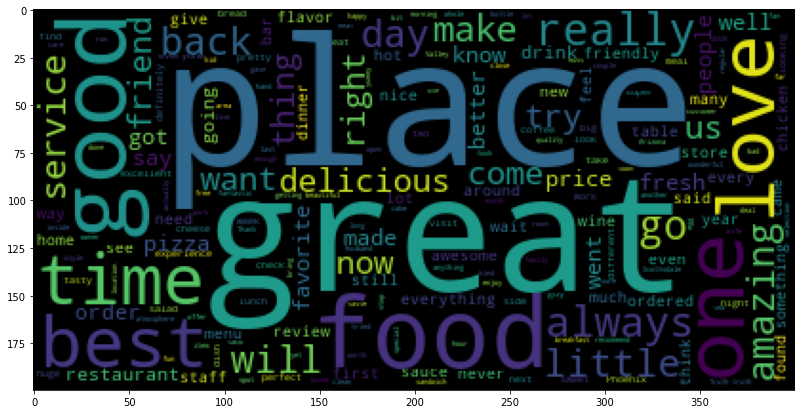

In [7]:
# using word cloud to look at most prominent words

num_stars =  5
this_star_text = ''
for t in yelp[yelp['stars'] == num_stars]['text'].values: # form field cell
    this_star_text += t + ' '
    
wordcloud = WordCloud()    
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(20,7))
plt.imshow(wordcloud)
print(this_star_text)

In [8]:
# implementing binary classification to determine if review is good or bad

def is_good_review(num_stars):
    if num_stars >= 4: ### YOUR CODE HERE
        return 'good'
    else:
      return 'bad'
      
yelp['is_good_review'] = yelp['stars'].apply(is_good_review) # yelp['stars] is acting as argument and being applied to function
yelp.head()

,stars,text,is_good_review
0,5,My wife took me here on my birthday for breakf...,good
1,5,I have no idea why some people give bad review...,good
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",good
3,5,General Manager Scott Petello is a good egg!!!...,good
4,5,Drop what you're doing and drive here. After I...,good


In [12]:
# text preprocessing

# tokenization

example_text = "All the people I spoke to were super nice and very welcoming."
# tokens = word_tokenize(example_text)
tokens = example_text.split(' ')
print(tokens)

# stop words

example_word = "the"
if example_word.lower() in STOP_WORDS:
  print ('"' + example_word + '" is a stop word.')
else:
  print ('"' + example_word + '" is NOT a stop word.')

# converting text to vectors using bag of words

review_1 = "the food was great the ambience was also great"
review_2 = "great ambience but not great food"
vocab_list = ["also", "ambience", "but", "food", "great", "not", "the", "was"]
list_words_r1 = review_1.split(' ')
list_words_r2 = review_2.split(' ')
counter_review_1 = []
counter_review_2 = []
for item in vocab_list:
  counter_review_1.append(list_words_r1.count(item))
  counter_review_2.append(list_words_r2.count(item))
print(counter_review_1)
print(counter_review_2)

['All', 'the', 'people', 'I', 'spoke', 'to', 'were', 'super', 'nice', 'and', 'very', 'welcoming.']
"the" is a stop word.
[1, 1, 0, 1, 2, 0, 2, 2]
[0, 1, 1, 1, 2, 1, 0, 0]


In [13]:
# using bag of words to prep data

X_text = yelp['text']
y = yelp['is_good_review']

In [14]:
def tokenize(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
            clean_tokens.append(token.lemma_)
    return clean_tokens

In [15]:
# using countvectorizer to tokenize reviews, remove stopwords and prep vocab
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=1000).fit(X_text)

In [16]:
# checking entire vocab of words

bow_transformer.vocabulary_
sorted_dict = sorted(bow_transformer.vocabulary_.items(), key = lambda x: x[1])
for i in sorted_dict:
  print(f'\'{i[0]}\': {i[1]}')

'
': 0
'

': 1
'
 ': 2
' ': 3
' 
': 4
' 

': 5
'  ': 6
'$': 7
'+': 8
'1': 9
'1/2': 10
'10': 11
'100': 12
'11': 13
'12': 14
'15': 15
'2': 16
'20': 17
'25': 18
'3': 19
'30': 20
'4': 21
'45': 22
'5': 23
'50': 24
'6': 25
'7': 26
'8': 27
'9': 28
'=': 29
'ASU': 30
'AZ': 31
'Arizona': 32
'BBQ': 33
'Burger': 34
'California': 35
'Chandler': 36
'Chicago': 37
'Chicken': 38
'Chili': 39
'Day': 40
'Food': 41
'Friday': 42
'Green': 43
'Grill': 44
'Happy': 45
'Hour': 46
'Ice': 47
'Joe': 48
'Mesa': 49
'Mexican': 50
'Mill': 51
'New': 52
'Old': 53
'Paradise': 54
'Phoenix': 55
'Pizza': 56
'Pork': 57
'Saturday': 58
'Scottsdale': 59
'Service': 60
'St.': 61
'Starbucks': 62
'Sunday': 63
'Tempe': 64
'Thai': 65
'Town': 66
'Valley': 67
'Wednesday': 68
'White': 69
'Yelp': 70
'able': 71
'absolutely': 72
'actually': 73
'add': 74
'addition': 75
'admit': 76
'adult': 77
'afternoon': 78
'ago': 79
'agree': 80
'ahead': 81
'air': 82
'allow': 83
'amazing': 84
'ambiance': 85
'annoying': 86
'answer': 87
'anymore': 88
'apologi

In [17]:
len(bow_transformer.vocabulary_)

1000

In [18]:
# transform each review into bag of words

X = bow_transformer.transform(X_text)

In [19]:
# seeing how reviews have been converted to numerical data

pd.DataFrame(X.toarray()) # in array of vocab words, how many times does each word occur in each review from 1-1000

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,3,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,18,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,11,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# creating baseline classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)

print (f'Accuracy is {round(accuracy * 100, 2)}%')

Accuracy is 76.0%


In [22]:
# testing out model on custom reviews

example_review = "horrible"
prediction = logistic_model.predict(bow_transformer.transform([example_review]))

if prediction:
  print ("This was a GOOD review!")
else:
  print ("This was a BAD review!")

This was a GOOD review!


In [24]:
# using multinomial naive bayes to predict class of input data

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
nb_model = MultinomialNB()
tree_model = DecisionTreeClassifier()

# using Bayes' theorem
nb_model.fit(X_train, y_train)
new_y_pred = nb_model.predict(X_test)
new_accuracy = accuracy_score(y_test, new_y_pred)
print(f'New accuracy is {round(new_accuracy * 100, 2)}%')

#using decision tree
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Next new accuracy is {round(accuracy_tree * 100, 2)}%')

New accuracy is 74.0%
Next new accuracy is 63.0%


In [26]:
# using word embeddings

# creating dictionary containing vectors for all words in vocab
vocab_dict = dict() #initialize dictionary

for word in bow_transformer.vocabulary_:
    vocab_dict[word] = text_to_nlp(word).vector # What is the key? What is the value?

for word, vec in vocab_dict.items(): # Iterating through the dictionary to print each key and value
  print ('Word: {}. Vector length: {}'.format(word, len(vec)))

print()
print ('{} words in our dictionary'.format(len(vocab_dict)))

Word: wife. Vector length: 300
Word: take. Vector length: 300
Word: birthday. Vector length: 300
Word: breakfast. Vector length: 300
Word: excellent. Vector length: 300
Word:  . Vector length: 300
Word: perfect. Vector length: 300
Word: sit. Vector length: 300
Word: outside. Vector length: 300
Word: ground. Vector length: 300
Word: waitress. Vector length: 300
Word: food. Vector length: 300
Word: arrive. Vector length: 300
Word: quickly. Vector length: 300
Word: busy. Vector length: 300
Word: Saturday. Vector length: 300
Word: morning. Vector length: 300
Word: look. Vector length: 300
Word: like. Vector length: 300
Word: place. Vector length: 300
Word: fill. Vector length: 300
Word: pretty. Vector length: 300
Word: early. Vector length: 300
Word: well. Vector length: 300
Word: 

. Vector length: 300
Word: simply. Vector length: 300
Word: good. Vector length: 300
Word: sure. Vector length: 300
Word: use. Vector length: 300
Word: ingredient. Vector length: 300
Word: fresh. Vector length:

In [28]:
# checking similarity using word2vec representation and plotting both vectors in space
v0 = [2,3,1]
v1 = [2,4,1]

import numpy as np 
import plotly.graph_objs as go

def vector_plot(tvects,is_vect=True,orig=[0,0,0]):
    """Plot vectors using plotly"""

    if is_vect:
        if not hasattr(orig[0],"__iter__"):
            coords = [[orig,np.sum([orig,v],axis=0)] for v in tvects]
        else:
            coords = [[o,np.sum([o,v],axis=0)] for o,v in zip(orig,tvects)]
    else:
        coords = tvects

    data = []
    for i,c in enumerate(coords):
        X1, Y1, Z1 = zip(c[0])
        X2, Y2, Z2 = zip(c[1])
        vector = go.Scatter3d(x = [X1[0],X2[0]],
                              y = [Y1[0],Y2[0]],
                              z = [Z1[0],Z2[0]],
                              marker = dict(size = [0,5],
                                            color = ['blue'],
                                            line=dict(width=5,
                                                      color='DarkSlateGrey')),
                              name = 'Vector'+str(i+1))
        data.append(vector)

    layout = go.Layout(
             margin = dict(l = 4,
                           r = 4,
                           b = 4,
                           t = 4)
                  )
    fig = go.Figure(data=data,layout=layout)
    fig.show()


vector_plot([v0,v1])

In [29]:
# implementing cosine similarity
def vector_cosine_similarity(vec1,vec2):
  #Assume vec1 and vec2 have the same size 

  numerator = 0
  for i in range(len(vec1)):
    numerator += vec1[i]*vec2[i]
  mag1 = (sum(elem**2 for elem in vec1))**0.5
  mag2 = (sum(elem**2 for elem in vec2))**0.5
  similarity = numerator/(mag1*mag2)
  return similarity

print(vector_cosine_similarity(v0,v1))

0.9914601339836675


In [30]:
# using cosine similarity to calculate similarity between 2 words

def word_similarity(word1, word2):
  #Should return a similarity between -1 and 1
  
  try:
    vec1 = vocab_dict[word1]
    vec2 = vocab_dict[word2]
    return vector_cosine_similarity(vec1,vec2)

  except KeyError:
    print ('Word not in dictionary')

print(word_similarity('burger','steak'))

0.9999999964315462


In [31]:
# find 5 nearest words for a particular word(outputs top 5 words whose vectors most similar to start_vec)
def find_nearest_neighbor(word):
  try:
    vec = vocab_dict[word]
    find_most_similar(vec)
  except KeyError:
    print ('Word not in dictionary')

def find_most_similar(start_vec):
  #Should print the top 5 most similar words to start_vec, and their similarities.,

  similarity_series = pd.Series(np.nan, index = vocab_dict.keys())
  for word, vec in vocab_dict.items():
    similarity_series[word] = vector_cosine_similarity(start_vec, vec)
  similarity_series = similarity_series[similarity_series.notna()] #get rid of N/A
  five_most_similar = similarity_series.sort_values().tail()
  print (five_most_similar) #words and similarities

find_nearest_neighbor('bagel')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in double_scalars



pickle        0.731345
bagel         1.000000
cheese        1.000000
mozzarella    1.000000
tortilla      1.000000
dtype: float64


In [33]:
# using previous analogies to find analogies for words(find word whose representation is closest to specified word vector)
def find_analogy(word_a1, word_a2, word_b1):
  #Convert the words to vectors a1, a2, b1
  #If word_a1:word_a2 as word_b1:word_b2, then 
  #a1 - a2 = b1 - b2
  #So b2 = ...
  #Calculate b2, and use your previous functions to find the best candidates for word_b2.

  a1_vec = vocab_dict[word_a1]
  a2_vec = vocab_dict[word_a2]
  b1_vec = vocab_dict[word_b1]
  find_most_similar(b1_vec - a1_vec + a2_vec)

find_analogy('breakfast','bagel','lunch')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in double_scalars



pickle        0.731345
bagel         1.000000
cheese        1.000000
mozzarella    1.000000
tortilla      1.000000
dtype: float64
